In [1]:
#Others
import random
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import math
import os
import warnings
import optuna
import joblib
import matplotlib.pyplot as plt

In [2]:
#Importing packages
#Sklearn
from sklearn import model_selection, linear_model
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc,roc_auc_score,roc_curve,classification_report
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn import preprocessing

In [3]:
#Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [4]:
os.chdir("C:/Users/A/Desktop/Bioactive/IL-1β")

In [5]:
#Reading the data
ML_data= pd.read_csv("./ML_data.csv",header=0,index_col=0)
X_NAomit_data= pd.read_csv("./X_NAomit_data.csv",header=0,index_col=0)
Raw_data = pd.read_csv('./data_psm.csv',index_col=0)

#original data(descriptors= 4175）
print(X_NAomit_data.shape)
X_NAomit_data.head()

(1134, 3964)


,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
OPTUM_LAB_ID,,,,,,,,,,,,,,,,,,,,,
53300413.0,704.02,6.518704,63.0926,107.4464,67.5519,122.5431,0.584191,0.994874,0.625481,1.134658,...,0.0,0.0,6.0,6.0,46.75,0.916667,10.625,0.208333,50.709541,12.001003
49795501.0,373.47,7.322941,31.3867,51.5196,32.6935,58.0300,0.615425,1.010188,0.641049,1.137843,...,0.0,0.0,5.0,6.0,23.50,0.870370,6.000,0.222222,21.400935,6.633250
9551212.0,487.74,6.869577,41.8673,70.7049,45.2221,80.6829,0.589680,0.995844,0.636931,1.136379,...,0.0,0.0,0.0,0.0,0.00,0.000000,0.000,0.000000,0.000000,0.000000
53300217.0,515.47,8.182063,40.9322,63.5306,43.2048,70.5350,0.649717,1.008422,0.685790,1.119603,...,0.0,0.0,6.0,6.0,25.50,0.728571,4.000,0.114286,20.296826,3.602880
1254489.0,477.98,8.241034,38.5457,58.6579,40.0684,64.8437,0.664581,1.011343,0.690834,1.117995,...,0.0,0.0,0.0,0.0,0.00,0.000000,0.000,0.000000,0.000000,0.000000


In [6]:
X_NAomit_data= pd.read_csv("./X_NAomit_data.csv",header=0,index_col=0)
X_NAomit_data

,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
OPTUM_LAB_ID,,,,,,,,,,,,,,,,,,,,,
53300413.0,704.02,6.518704,63.0926,107.4464,67.5519,122.5431,0.584191,0.994874,0.625481,1.134658,...,0.0,0.0,6.0,6.0,46.750000,0.916667,10.625000,0.208333,50.709541,12.001003
49795501.0,373.47,7.322941,31.3867,51.5196,32.6935,58.0300,0.615425,1.010188,0.641049,1.137843,...,0.0,0.0,5.0,6.0,23.500000,0.870370,6.000000,0.222222,21.400935,6.633250
9551212.0,487.74,6.869577,41.8673,70.7049,45.2221,80.6829,0.589680,0.995844,0.636931,1.136379,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
53300217.0,515.47,8.182063,40.9322,63.5306,43.2048,70.5350,0.649717,1.008422,0.685790,1.119603,...,0.0,0.0,6.0,6.0,25.500000,0.728571,4.000000,0.114286,20.296826,3.602880
1254489.0,477.98,8.241034,38.5457,58.6579,40.0684,64.8437,0.664581,1.011343,0.690834,1.117995,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53382587.0,306.35,7.658750,24.8312,40.9089,25.3751,45.3652,0.620780,1.022722,0.634378,1.134130,...,0.0,0.0,2.0,6.0,17.000000,0.772727,5.666667,0.257576,14.965511,5.130768
53301482.0,559.66,7.882535,47.4866,71.4287,49.1878,78.9395,0.668825,1.006038,0.692786,1.111824,...,0.0,6.0,5.0,18.0,34.500000,0.821429,8.000000,0.190476,39.408121,9.797959
53301383.0,298.40,7.852632,23.3035,38.6580,24.5683,43.0758,0.613250,1.017316,0.646534,1.133574,...,0.0,0.0,1.0,4.0,18.000000,0.900000,5.500000,0.275000,22.053235,7.123106


In [7]:
col_data= pd.read_csv("./X_NAomit_data.csv",header=0,index_col=0)

In [8]:
X_NAomit_data

,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
OPTUM_LAB_ID,,,,,,,,,,,,,,,,,,,,,
53300413.0,704.02,6.518704,63.0926,107.4464,67.5519,122.5431,0.584191,0.994874,0.625481,1.134658,...,0.0,0.0,6.0,6.0,46.750000,0.916667,10.625000,0.208333,50.709541,12.001003
49795501.0,373.47,7.322941,31.3867,51.5196,32.6935,58.0300,0.615425,1.010188,0.641049,1.137843,...,0.0,0.0,5.0,6.0,23.500000,0.870370,6.000000,0.222222,21.400935,6.633250
9551212.0,487.74,6.869577,41.8673,70.7049,45.2221,80.6829,0.589680,0.995844,0.636931,1.136379,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
53300217.0,515.47,8.182063,40.9322,63.5306,43.2048,70.5350,0.649717,1.008422,0.685790,1.119603,...,0.0,0.0,6.0,6.0,25.500000,0.728571,4.000000,0.114286,20.296826,3.602880
1254489.0,477.98,8.241034,38.5457,58.6579,40.0684,64.8437,0.664581,1.011343,0.690834,1.117995,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53382587.0,306.35,7.658750,24.8312,40.9089,25.3751,45.3652,0.620780,1.022722,0.634378,1.134130,...,0.0,0.0,2.0,6.0,17.000000,0.772727,5.666667,0.257576,14.965511,5.130768
53301482.0,559.66,7.882535,47.4866,71.4287,49.1878,78.9395,0.668825,1.006038,0.692786,1.111824,...,0.0,6.0,5.0,18.0,34.500000,0.821429,8.000000,0.190476,39.408121,9.797959
53301383.0,298.40,7.852632,23.3035,38.6580,24.5683,43.0758,0.613250,1.017316,0.646534,1.133574,...,0.0,0.0,1.0,4.0,18.000000,0.900000,5.500000,0.275000,22.053235,7.123106


In [9]:
threshold = 0.99  # 如果列中 0 的比例超过 90%，则移除该列
non_zero_threshold = X_NAomit_data.shape[0] * (1 - threshold)
X_NAomit_data =X_NAomit_data.loc[:, (X_NAomit_data != 0).sum(axis=0) > non_zero_threshold]

In [10]:
X_NAomit_data 

,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s4_numRotBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
OPTUM_LAB_ID,,,,,,,,,,,,,,,,,,,,,
53300413.0,704.02,6.518704,63.0926,107.4464,67.5519,122.5431,0.584191,0.994874,0.625481,1.134658,...,10.000000,0.0,6.0,6.0,46.750000,0.916667,10.625000,0.208333,50.709541,12.001003
49795501.0,373.47,7.322941,31.3867,51.5196,32.6935,58.0300,0.615425,1.010188,0.641049,1.137843,...,1.000000,0.0,5.0,6.0,23.500000,0.870370,6.000000,0.222222,21.400935,6.633250
9551212.0,487.74,6.869577,41.8673,70.7049,45.2221,80.6829,0.589680,0.995844,0.636931,1.136379,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
53300217.0,515.47,8.182063,40.9322,63.5306,43.2048,70.5350,0.649717,1.008422,0.685790,1.119603,...,3.000000,0.0,6.0,6.0,25.500000,0.728571,4.000000,0.114286,20.296826,3.602880
1254489.0,477.98,8.241034,38.5457,58.6579,40.0684,64.8437,0.664581,1.011343,0.690834,1.117995,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53382587.0,306.35,7.658750,24.8312,40.9089,25.3751,45.3652,0.620780,1.022722,0.634378,1.134130,...,2.000000,0.0,2.0,6.0,17.000000,0.772727,5.666667,0.257576,14.965511,5.130768
53301482.0,559.66,7.882535,47.4866,71.4287,49.1878,78.9395,0.668825,1.006038,0.692786,1.111824,...,6.000000,6.0,5.0,18.0,34.500000,0.821429,8.000000,0.190476,39.408121,9.797959
53301383.0,298.40,7.852632,23.3035,38.6580,24.5683,43.0758,0.613250,1.017316,0.646534,1.133574,...,1.000000,0.0,1.0,4.0,18.000000,0.900000,5.500000,0.275000,22.053235,7.123106


In [11]:
X=np.array(X_NAomit_data)
X

array([[7.04020000e+02, 6.51870370e+00, 6.30926000e+01, ...,
        2.08333333e-01, 5.07095408e+01, 1.20010035e+01],
       [3.73470000e+02, 7.32294118e+00, 3.13867000e+01, ...,
        2.22222222e-01, 2.14009346e+01, 6.63324958e+00],
       [4.87740000e+02, 6.86957746e+00, 4.18673000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.98400000e+02, 7.85263158e+00, 2.33035000e+01, ...,
        2.75000000e-01, 2.20532347e+01, 7.12310563e+00],
       [4.99570000e+02, 8.05758065e+00, 4.09490000e+01, ...,
        2.70270270e-01, 2.54558441e+01, 1.03923048e+01],
       [5.08690000e+02, 7.48073529e+00, 4.27059000e+01, ...,
        1.75925926e-01, 4.01269953e+01, 9.09012748e+00]])

In [12]:
X_NAomit_data 

,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s4_numRotBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
OPTUM_LAB_ID,,,,,,,,,,,,,,,,,,,,,
53300413.0,704.02,6.518704,63.0926,107.4464,67.5519,122.5431,0.584191,0.994874,0.625481,1.134658,...,10.000000,0.0,6.0,6.0,46.750000,0.916667,10.625000,0.208333,50.709541,12.001003
49795501.0,373.47,7.322941,31.3867,51.5196,32.6935,58.0300,0.615425,1.010188,0.641049,1.137843,...,1.000000,0.0,5.0,6.0,23.500000,0.870370,6.000000,0.222222,21.400935,6.633250
9551212.0,487.74,6.869577,41.8673,70.7049,45.2221,80.6829,0.589680,0.995844,0.636931,1.136379,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
53300217.0,515.47,8.182063,40.9322,63.5306,43.2048,70.5350,0.649717,1.008422,0.685790,1.119603,...,3.000000,0.0,6.0,6.0,25.500000,0.728571,4.000000,0.114286,20.296826,3.602880
1254489.0,477.98,8.241034,38.5457,58.6579,40.0684,64.8437,0.664581,1.011343,0.690834,1.117995,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53382587.0,306.35,7.658750,24.8312,40.9089,25.3751,45.3652,0.620780,1.022722,0.634378,1.134130,...,2.000000,0.0,2.0,6.0,17.000000,0.772727,5.666667,0.257576,14.965511,5.130768
53301482.0,559.66,7.882535,47.4866,71.4287,49.1878,78.9395,0.668825,1.006038,0.692786,1.111824,...,6.000000,6.0,5.0,18.0,34.500000,0.821429,8.000000,0.190476,39.408121,9.797959
53301383.0,298.40,7.852632,23.3035,38.6580,24.5683,43.0758,0.613250,1.017316,0.646534,1.133574,...,1.000000,0.0,1.0,4.0,18.000000,0.900000,5.500000,0.275000,22.053235,7.123106


In [13]:
Raw_data

,IsomericSMILES,Activity,Canonical_smiles
OPTUM_LAB_ID,,,
53300413.0,CCOC1=CC=C(C=C1)CCN2[C@H](CN(C(=O)C2=O)[C@@H](...,1,CCOc1ccc(CCN2C(=O)C(=O)N([C@@H](CC(C)C)CN3CCC[...
49795501.0,CC1=C(C=C(C=C1)F)C(=O)N2CCCCC2C3=CC(=NO3)C(=O)...,1,Cc1ccc(F)cc1C(=O)N1CCCCC1c1cc(C(=O)NC(C)C)no1
9551212.0,CC1CCN(CC1)CCCNC(=O)CCCNC(=O)CN2C=NC3=C(C2=O)C...,1,CC1CCN(CCCNC(=O)CCCNC(=O)Cn2cnc3sc4c(c3c2=O)CC...
53300217.0,CCOC(=O)[C@]12CCC=C1N(C(=O)[C@@H](C2)CC(=O)NCC...,1,CCOC(=O)[C@]12CCC=C1N(Cc1ccc(Cl)cc1Cl)C(=O)[C@...
1254489.0,C1CN(CCN1C2=CC=C(C=C2)NC(=O)C3=CC4=C(C=C3)OCCO...,1,O=C(Nc1ccc(N2CCN(C(=O)c3ccc(Cl)cc3)CC2)cc1)c1c...
...,...,...,...
53382587.0,COC(=O)C[C@H]1C=C[C@@H]([C@H](O1)CO)NC(=O)C2=C...,0,COC(=O)C[C@H]1C=C[C@H](NC(=O)c2ccccn2)[C@@H](C...
53301482.0,COC1=CC(=CC(=C1)C2=CC3=CC=CC=C3C(N2C4=CC=C(C=C...,0,COc1cc(OC)cc(C2=Cc3ccccc3C(CC(=O)c3ccco3)N2c2c...
53301383.0,C[C@H]1COC2=C(C=CC(=C2)N3CC[C@@H](C3)O)S(=O)(=...,0,C[C@H]1COc2cc(N3CC[C@H](O)C3)ccc2S(=O)(=O)N1


In [14]:
y=Raw_data['Activity']

In [15]:
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

# 1. LASSO

In [16]:
model = make_pipeline(StandardScaler(), LassoCV(cv=Cv_model)).fit(X, y)

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e-02, tolerance: 2.267e-02
  model = cd_fast.enet_coordinate_descent(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.402e-02, tolerance: 2.267e-02
  model = cd_fast.enet_coordinate_descent(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.02

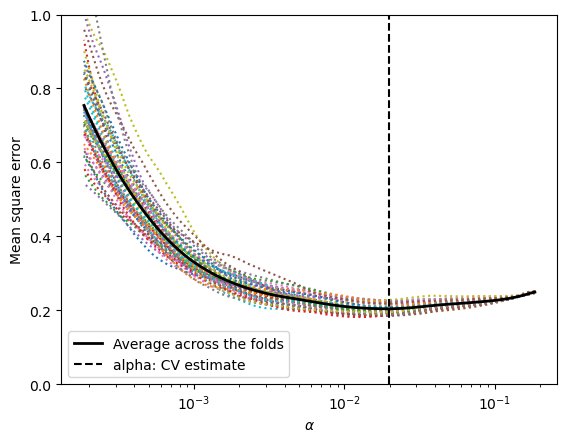

In [17]:
ymin, ymax =0, 1
lasso = model[-1]
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()


In [18]:
lasso.alpha_

0.019831648654000496

In [19]:
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

In [20]:
lsvc =  Lasso(alpha=lasso.alpha_).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.011e+02, tolerance: 2.835e-02
  model = cd_fast.enet_coordinate_descent(


(1134, 149)

In [21]:
lasso_coef=pd.DataFrame(lsvc.coef_)
lasso_coef.index=X_NAomit_data.columns
lasso_coef.columns=["coef"]
lasso_coef


,coef
MW,-0.000000
AMW,0.000000
Sv,-0.000000
Se,-0.000000
Sp,-0.000000
...,...
s34_relSize,-0.000000
s34_phSize,-0.000000
s34_phRelSize,-0.000000
chiralMoment,-0.000000


In [22]:
lasso_coef_last=lasso_coef[(lasso_coef["coef"]>0)|(lasso_coef["coef"]<0)]
lasso_coef_last.to_csv("./Supplementary Data S6.csv",sep=',')
lasso_coef_last.head()

,coef
max_conj_path,0.003253
D/Dtr03,-0.000369
D/Dtr04,0.000386
D/Dtr05,0.000562
D/Dtr07,-0.001067


In [23]:
Lasso_data=X_NAomit_data[X_NAomit_data.columns[model.get_support()]]
Lasso_data

,max_conj_path,D/Dtr03,D/Dtr04,D/Dtr05,D/Dtr07,D/Dtr08,D/Dtr09,D/Dtr10,D/Dtr11,D/Dtr12,...,SAtot,SAacc,SAdon,Vx,s3_pathLength,s4_pathLength,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,chiralPhMoment
OPTUM_LAB_ID,,,,,,,,,,,,,,,,,,,,,
53300413.0,6.0,0.0,0.0,164.807796,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,1014.984535,184.770945,60.694094,934.019934,9.500000,15.500000,0.0,6.0,6.0,12.001003
49795501.0,8.0,0.0,0.0,71.350836,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,493.648034,115.715750,18.010751,463.936877,7.000000,6.000000,0.0,5.0,6.0,6.633250
9551212.0,9.0,0.0,0.0,73.714472,0.000000,0.0,283.868540,0.000000,0.000000,0.0,...,653.418581,134.490440,36.021501,627.458472,0.000000,0.000000,0.0,0.0,0.0,0.000000
53300217.0,6.0,0.0,0.0,86.377798,0.000000,0.0,152.709043,0.000000,0.000000,0.0,...,649.469869,107.569734,18.010751,619.219269,8.000000,9.000000,0.0,6.0,6.0,3.602880
1254489.0,8.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,184.947089,0.000000,0.0,...,563.560715,96.549008,18.010751,566.877076,0.000000,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53382587.0,8.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,422.605860,149.769253,60.694094,372.093023,7.333333,7.333333,0.0,2.0,6.0,5.130768
53301482.0,14.0,0.0,0.0,103.394861,0.000000,0.0,0.000000,199.092648,0.000000,0.0,...,690.291068,104.347310,0.000000,689.784053,5.000000,11.000000,6.0,5.0,18.0,9.797959
53301383.0,6.0,0.0,0.0,46.313595,52.729507,0.0,0.000000,0.000000,81.047583,0.0,...,369.813744,117.525494,59.088341,346.079734,3.500000,9.000000,0.0,1.0,4.0,7.123106


In [24]:
Lasso_data.to_csv('./Lasso_data.csv',encoding='utf-8')

In [25]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(Lasso_data)
X_scaled_data=Transformer.transform(Lasso_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=Lasso_data.columns
X_scaled_data.index=Raw_data.index

joblib.dump(Transformer, './Lasso_Scaler_transformer.pkl')

X_scaled_data

,max_conj_path,D/Dtr03,D/Dtr04,D/Dtr05,D/Dtr07,D/Dtr08,D/Dtr09,D/Dtr10,D/Dtr11,D/Dtr12,...,SAtot,SAacc,SAdon,Vx,s3_pathLength,s4_pathLength,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,chiralPhMoment
OPTUM_LAB_ID,,,,,,,,,,,,,,,,,,,,,
53300413.0,0.230769,0.0,0.0,0.319903,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.787557,0.375451,0.177745,0.826795,0.745098,0.596154,0.000000,0.500000,0.176471,0.351907
49795501.0,0.307692,0.0,0.0,0.138497,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.269680,0.193352,0.052745,0.290463,0.549020,0.230769,0.000000,0.416667,0.176471,0.194508
9551212.0,0.346154,0.0,0.0,0.143085,0.000000,0.0,0.485380,0.000000,0.000000,0.0,...,0.428390,0.242861,0.105491,0.477030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
53300217.0,0.230769,0.0,0.0,0.167665,0.000000,0.0,0.261113,0.000000,0.000000,0.0,...,0.424468,0.171870,0.052745,0.467629,0.627451,0.346154,0.000000,0.500000,0.176471,0.105648
1254489.0,0.307692,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.405948,0.000000,0.0,...,0.339129,0.142809,0.052745,0.407911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53382587.0,0.307692,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.199110,0.283151,0.177745,0.185676,0.575163,0.282051,0.000000,0.166667,0.176471,0.150450
53301482.0,0.538462,0.0,0.0,0.200696,0.000000,0.0,0.000000,0.436997,0.000000,0.0,...,0.465018,0.163373,0.000000,0.548139,0.392157,0.423077,0.545455,0.416667,0.529412,0.287307
53301383.0,0.230769,0.0,0.0,0.089898,0.226654,0.0,0.000000,0.000000,0.383550,0.0,...,0.146668,0.198124,0.173043,0.155997,0.274510,0.346154,0.000000,0.083333,0.117647,0.208872


In [ ]:
Lasso_data= pd.read_csv("./Lasso_data.csvv",header=0,index_col=0)

Raw_data = pd.read_csv('.Lasso_Scaler_transformer)

In [26]:
def Model_results(Model_clf,X_test,y,Cv_model):
    Model_scores= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=True)
    Model_score= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=False)
#Accuracy
    Model_Accuracy_test_mean=Model_scores['test_accuracy'].mean()
    Model_Accuracy_test_se=(Model_scores['test_accuracy'].std()/math.sqrt(len(Model_scores['test_accuracy']))) 
    Model_Accuracy_train_mean=Model_scores['train_accuracy'].mean()
    Model_Accuracy_train_se=(Model_scores['train_accuracy'].std()/math.sqrt(len(Model_scores['train_accuracy']))) 
#f1
    Model_f1_mean=Model_score['test_f1'].mean()
    Model_f1_se=(Model_score['test_f1'].std()/math.sqrt(len(Model_score['test_f1']))) 
#precision
    Model_precision_mean=Model_score['test_precision'].mean()
    Model_precision_se=(Model_score['test_precision'].std()/math.sqrt(len(Model_score['test_precision']))) 
#recall
    Model_recall_mean=Model_score['test_recall'].mean()
    Model_recall_se=(Model_score['test_recall'].std()/math.sqrt(len(Model_score['test_recall']))) 
#roc_auc
    Model_roc_auc_mean=Model_score['test_roc_auc'].mean()
    Model_roc_auc_se=(Model_score['test_roc_auc'].std()/math.sqrt(len(Model_score['test_roc_auc']))) 
    Model = {'Mean':[Model_Accuracy_test_mean,Model_Accuracy_train_mean,Model_f1_mean,Model_precision_mean,Model_recall_mean,Model_roc_auc_mean],
        'Se':[Model_Accuracy_test_se,Model_Accuracy_train_se,Model_f1_se,Model_precision_se,Model_recall_se,Model_roc_auc_se]}
    Model = pd.DataFrame(Model, index=['Accuracy_test','Accuracy_train','F1 Score','Precision','Recall','Roc_auc']) # 这里设定了 index 个数要和列表长度一致
    return Model

In [27]:
#Setting the KFold 
Cv_optuna= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_RFECV= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

In [28]:
#Data pre-processing of models
X=np.array(X_scaled_data)
y=Raw_data['Activity'].values

## 1.1 DT

In [29]:
clf=DecisionTreeClassifier(random_state=0)

In [30]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.611278,0.004576
Accuracy_train,0.999317,0.000076
F1 Score,0.609712,0.005344
Precision,0.611890,0.004527
Recall,0.609177,0.007503
Roc_auc,0.611871,0.004561


In [31]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth',3,5,1),
        'max_features' : trial.suggest_int("max_features",10,20,1),
        'min_samples_split':trial.suggest_int('min_samples_split',2,25,1)
    }
    model = DecisionTreeClassifier(**param,random_state=1)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=12, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-11-15 06:04:06,756] A new study created in memory with name: no-name-6adabdfb-2395-4c5a-a5c0-833c9a589db8
[I 2024-11-15 06:04:09,878] Trial 0 finished with value: 0.620705625511676 and parameters: {'max_depth': 4, 'max_features': 17, 'min_samples_split': 16}. Best is trial 0 with value: 0.620705625511676.
[I 2024-11-15 06:04:10,033] Trial 1 finished with value: 0.6171973802190948 and parameters: {'max_depth': 4, 'max_features': 14, 'min_samples_split': 17}. Best is trial 0 with value: 0.620705625511676.
[I 2024-11-15 06:04:10,203] Trial 2 finished with value: 0.6215901914155393 and parameters: {'max_depth': 4, 'max_features': 19, 'min_samples_split': 25}. Best is trial 2 with value: 0.6215901914155393.
[I 2024-11-15 06:04:10,357] Trial 3 finished with value: 0.620799578963783 and parameters: {'max_depth': 4, 'max_features': 18, 'min_samples_split': 14}. Best is trial 2 with value: 0.6215901914155393.
[I 2024-11-15 06:04:10,530] Trial 4 finished with value: 0.6238041401894663 an

In [32]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf =DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)

The best parameters are : 
{'max_depth': 4, 'max_features': 15, 'min_samples_split': 20}


In [33]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.629531,0.003900
Accuracy_train,0.704631,0.001940
F1 Score,0.608093,0.006565
Precision,0.649133,0.006276
Recall,0.583147,0.013156
Roc_auc,0.660283,0.003994


In [34]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['DT']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./DT_model_lasso_data.csv",sep=',')
Model_data

Method                DT                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.611278  0.004576  0.629531  0.003900
Accuracy_train  0.999317  0.000076  0.704631  0.001940
F1 Score        0.609712  0.005344  0.608093  0.006565
Precision       0.611890  0.004527  0.649133  0.006276
Recall          0.609177  0.007503  0.583147  0.013156
Roc_auc         0.611871  0.004561  0.660283  0.003994

## 1.2 LR

In [35]:
clf=LogisticRegression(solver='liblinear',random_state=0,dual=False)

In [36]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.702293,0.004176
Accuracy_train,0.746120,0.001286
F1 Score,0.705000,0.004515
Precision,0.698443,0.004082
Recall,0.712731,0.006222
Roc_auc,0.765978,0.004563


In [37]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    logreg_c = trial.suggest_float("logreg_c", 1e-3,  1e3, log=True)
    l1_ratio = trial.suggest_float("l1_ratio",0.1,1,log=False) 
    #penalty = trial.suggest_categorical("penalty",['l1','l2'])
    max_iter = trial.suggest_int("max_iter", 100,2000)
    model =LogisticRegression(C=logreg_c,
                              max_iter=max_iter,
                              l1_ratio=l1_ratio,
                              solver='liblinear',random_state=1)
    
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=1))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-11-15 06:04:27,807] A new study created in memory with name: no-name-a9daf120-b53d-41db-94e4-3d1d7017bd36
[I 2024-11-15 06:04:30,353] Trial 0 finished with value: 0.6904728860473276 and parameters: {'logreg_c': 0.3177840006884068, 'l1_ratio': 0.7482920440979423, 'max_iter': 100}. Best is trial 0 with value: 0.6904728860473276.
[I 2024-11-15 06:04:30,524] Trial 1 finished with value: 0.674863358153678 and parameters: {'logreg_c': 0.0651621545821569, 'l1_ratio': 0.23208030173540176, 'max_iter': 275}. Best is trial 0 with value: 0.6904728860473276.
[I 2024-11-15 06:04:30,694] Trial 2 finished with value: 0.6645514794744843 and parameters: {'logreg_c': 0.013108749615263334, 'l1_ratio': 0.411004654338743, 'max_iter': 854}. Best is trial 0 with value: 0.6904728860473276.
[I 2024-11-15 06:04:30,914] Trial 3 finished with value: 0.7073209621457253 and parameters: {'logreg_c': 1.7096232052870346, 'l1_ratio': 0.4772750629629653, 'max_iter': 1402}. Best is trial 3 with value: 0.7073209621

In [38]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=LogisticRegression(C=study.best_params['logreg_c'],
                              max_iter=study.best_params['max_iter'],
                              l1_ratio=study.best_params['l1_ratio'],
                              solver='liblinear',
                              random_state=1)

The best parameters are : 
{'logreg_c': 70.67918903476476, 'l1_ratio': 0.2011669824999463, 'max_iter': 792}


In [39]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda

,Mean,Se
Accuracy_test,0.725224,0.004909
Accuracy_train,0.794510,0.001356
F1 Score,0.726101,0.005013
Precision,0.724247,0.005249
Recall,0.729315,0.006561
Roc_auc,0.784072,0.004418


In [40]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['LR']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./LR_model_lasso_data.csv",sep=',')
Model_data

Method                LR                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.702293  0.004176  0.725224  0.004909
Accuracy_train  0.746120  0.001286  0.794510  0.001356
F1 Score        0.705000  0.004515  0.726101  0.005013
Precision       0.698443  0.004082  0.724247  0.005249
Recall          0.712731  0.006222  0.729315  0.006561
Roc_auc         0.765978  0.004563  0.784072  0.004418

## 1.3 RF

In [41]:
clf=RandomForestClassifier(random_state=0)

In [42]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.684210,0.004595
Accuracy_train,0.999317,0.000076
F1 Score,0.680396,0.004839
Precision,0.689501,0.005290
Recall,0.673363,0.006661
Roc_auc,0.752851,0.004617


In [43]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators",100,1000,1) 
    max_depth = trial.suggest_int("max_depth",5,20,1)
    max_features = trial.suggest_int("max_features",5,30,1)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) 
    model = RandomForestClassifier(n_estimators = n_estimators
              ,max_depth = max_depth
              ,max_features = max_features
              ,min_impurity_decrease = min_impurity_decrease
              ,random_state=1
              ,verbose=False
              ,n_jobs=8)

# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)

[I 2024-11-15 06:05:32,523] A new study created in memory with name: no-name-f3a3393c-ae76-4f65-9087-cc496c458d52
[I 2024-11-15 06:05:37,388] Trial 0 finished with value: 0.4982378854625551 and parameters: {'n_estimators': 594, 'max_depth': 16, 'max_features': 20, 'min_impurity_decrease': 2.724415914984484}. Best is trial 0 with value: 0.4982378854625551.
[I 2024-11-15 06:05:41,272] Trial 1 finished with value: 0.4982378854625551 and parameters: {'n_estimators': 481, 'max_depth': 15, 'max_features': 16, 'min_impurity_decrease': 4.4588650039103985}. Best is trial 0 with value: 0.4982378854625551.
[I 2024-11-15 06:05:48,944] Trial 2 finished with value: 0.4982378854625551 and parameters: {'n_estimators': 968, 'max_depth': 11, 'max_features': 25, 'min_impurity_decrease': 2.644474598764522}. Best is trial 0 with value: 0.4982378854625551.
[I 2024-11-15 06:05:53,899] Trial 3 finished with value: 0.4982378854625551 and parameters: {'n_estimators': 611, 'max_depth': 19, 'max_features': 6, 'mi

In [44]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

The best parameters are : 
{'n_estimators': 500, 'max_depth': 8, 'max_features': 15, 'min_impurity_decrease': 0.00020102658536092465}


In [45]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.690040,0.004418
Accuracy_train,0.974559,0.000639
F1 Score,0.689921,0.004605
Precision,0.690673,0.004717
Recall,0.690829,0.006580
Roc_auc,0.761245,0.004561


In [46]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['RF']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./RF_model_lasso_data.csv",sep=',')
Model_data

Method                RF                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.684210  0.004595  0.690040  0.004418
Accuracy_train  0.999317  0.000076  0.974559  0.000639
F1 Score        0.680396  0.004839  0.689921  0.004605
Precision       0.689501  0.005290  0.690673  0.004717
Recall          0.673363  0.006661  0.690829  0.006580
Roc_auc         0.752851  0.004617  0.761245  0.004561

## 1.4 XGBoost

In [47]:
clf=xgb.XGBClassifier(random_state=0)

In [48]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.688091,0.004008
Accuracy_train,0.999317,0.000076
F1 Score,0.685420,0.004215
Precision,0.691997,0.004584
Recall,0.680587,0.006059
Roc_auc,0.756918,0.004106


In [49]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3,1.0,step=0.1),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0, step=0.1),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.2, step=0.005),
        'n_estimators': trial.suggest_int("n_estimators",50,1000,1)
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBClassifier(**param,random_state=1,n_jobs=8)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-11-15 06:12:09,340] A new study created in memory with name: no-name-8e6ccf6e-8eae-4e72-9cce-42eb3226e702
C:\Users\A\AppData\Local\Temp\ipykernel_98568\2666013998.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
C:\Users\A\AppData\Local\Temp\ipykernel_98568\2666013998.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
E:\C++\anaconda\envs\hydrogel\lib\site-packages\optuna\distributions.py:668: UserWarning: The distribution is specified by [0.0001, 0.2] and step=0.005, but the range is not divisible by `step`. It will be 

In [50]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)

The best parameters are : 
{'lambda': 0.0014120707067339939, 'alpha': 8.030994366953419, 'colsample_bytree': 0.6000000000000001, 'subsample': 0.4, 'learning_rate': 0.0751, 'n_estimators': 978}


In [51]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.705466,0.003962
Accuracy_train,0.966755,0.000557
F1 Score,0.703966,0.004165
Precision,0.708131,0.004632
Recall,0.701217,0.005744
Roc_auc,0.777842,0.003955


In [52]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['XGB']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./XGB_model_lasso_data.csv",sep=',')
Model_data

Method               XGB                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.688091  0.004008  0.705466  0.003962
Accuracy_train  0.999317  0.000076  0.966755  0.000557
F1 Score        0.685420  0.004215  0.703966  0.004165
Precision       0.691997  0.004584  0.708131  0.004632
Recall          0.680587  0.006059  0.701217  0.005744
Roc_auc         0.756918  0.004106  0.777842  0.003955

# 2. MLREM

In [90]:
col_data= pd.read_csv("./Results/MLREM_col.csv",header=0,index_col=0)

In [91]:
MRLEM_data=X_NAomit_data[col_data.index]
MRLEM_data

,MW,D/Dtr09,ZM1MulPer,ECC,CENT,SMTI,SMTIV,GMTIV,Wap,IDMT,...,ATSC5s,P_VSA_MR_3,P_VSA_ppp_ar,P_VSA_ppp_con,P_VSA_charge_2,SM15_EA(ed),T(O..Br),TPSA(Tot),SAdon,Vx
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,267.28,66.871159,348.869542,135.0,383.0,2886.0,5576.0,10547.0,5729.0,4739.692713,...,90.763661,139.049917,75.680233,63.202194,1.899093,36.892542,0.0,139.54,160.947217,291.295681
Ma_2019_U,244.23,0.000000,340.039426,118.0,295.0,2084.0,4432.0,8734.0,2194.0,3416.557603,...,139.839496,139.049917,0.000000,48.373245,46.279992,36.205320,0.0,124.78,146.060780,262.840532
Ma_2019_C,243.25,0.000000,319.988367,118.0,295.0,2084.0,4240.0,7972.0,2194.0,3416.557603,...,137.031903,139.049917,0.000000,67.057867,3.124314,36.205320,0.0,130.83,160.947217,269.667774
Ma_2019_G,283.28,71.547747,387.546658,144.0,446.0,3270.0,6542.0,12768.0,6578.0,5547.544286,...,117.471961,139.049917,32.387883,80.922082,45.054770,36.939118,0.0,159.51,178.957968,301.046512
Ma_2019_dA,251.28,63.146800,315.599992,128.0,336.0,2584.0,4822.0,8812.0,5068.0,4099.715332,...,52.221046,96.366574,75.680233,63.202194,1.899093,36.335611,0.0,119.31,118.263874,281.544850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tang_2019_ArabinoC,243.25,0.000000,319.988367,118.0,295.0,2084.0,4240.0,7972.0,2194.0,3416.557603,...,137.031903,139.049917,0.000000,67.057867,3.124314,36.205320,0.0,130.83,160.947217,269.667774
Tang_2019_DideoxyC,211.25,0.000000,253.494297,103.0,213.0,1585.0,2963.0,5062.0,1633.0,2398.199373,...,59.519699,53.683231,0.000000,67.057867,3.124314,34.619300,0.0,90.37,75.580531,250.166113
Peters_2014_3,268.26,66.871159,369.000658,135.0,383.0,2886.0,5763.0,11275.0,5729.0,4739.692713,...,100.945467,139.049917,32.387883,87.641582,27.044020,36.892542,0.0,133.49,146.060780,284.468439


In [92]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(MRLEM_data)
X_scaled_data=Transformer.transform(MRLEM_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=MRLEM_data.columns
X_scaled_data.index=Raw_data.index
X_scaled_data.to_csv("./Original data/MRLEM_data_X_scaled_data.csv",sep=',',header=1,index=1)
joblib.dump(Transformer, './Models/MRLEM_data_Scaler_transformer.pkl')

X_scaled_data.head()

,MW,D/Dtr09,ZM1MulPer,ECC,CENT,SMTI,SMTIV,GMTIV,Wap,IDMT,...,ATSC5s,P_VSA_MR_3,P_VSA_ppp_ar,P_VSA_ppp_con,P_VSA_charge_2,SM15_EA(ed),T(O..Br),TPSA(Tot),SAdon,Vx
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,0.128645,0.181294,0.193207,0.036281,0.026667,0.030815,0.037803,0.044265,0.024087,0.024617,...,0.176802,0.999046,0.285905,0.104723,0.015761,0.446054,0.0,0.472652,0.769847,0.069993
Ma_2019_U,0.075722,0.000000,0.175319,0.017007,0.012863,0.011819,0.021252,0.029633,0.003299,0.010706,...,0.401921,0.999046,0.000000,0.031193,0.384100,0.311208,0.0,0.330770,0.665700,0.021569
Ma_2019_C,0.073472,0.000000,0.134701,0.017007,0.012863,0.011819,0.018475,0.023484,0.003299,0.010706,...,0.389042,0.999046,0.000000,0.123842,0.025930,0.311208,0.0,0.388926,0.769847,0.033187
Ma_2019_G,0.165381,0.193972,0.271557,0.046485,0.036549,0.039910,0.051778,0.062188,0.029080,0.033111,...,0.299317,0.999046,0.122355,0.192589,0.373931,0.455193,0.0,0.664616,0.895853,0.086587
Ma_2019_dA,0.091909,0.171197,0.125811,0.028345,0.019294,0.023662,0.026894,0.030263,0.020200,0.017889,...,0.000000,0.666030,0.285905,0.104723,0.015761,0.336774,0.0,0.278189,0.471230,0.053399


In [93]:
def Model_results(Model_clf,X_test,y,Cv_model):
    Model_scores= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=True)
    Model_score= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=False)
#Accuracy
    Model_Accuracy_test_mean=Model_scores['test_accuracy'].mean()
    Model_Accuracy_test_se=(Model_scores['test_accuracy'].std()/math.sqrt(len(Model_scores['test_accuracy']))) 
    Model_Accuracy_train_mean=Model_scores['train_accuracy'].mean()
    Model_Accuracy_train_se=(Model_scores['train_accuracy'].std()/math.sqrt(len(Model_scores['train_accuracy']))) 
#f1
    Model_f1_mean=Model_score['test_f1'].mean()
    Model_f1_se=(Model_score['test_f1'].std()/math.sqrt(len(Model_score['test_f1']))) 
#precision
    Model_precision_mean=Model_score['test_precision'].mean()
    Model_precision_se=(Model_score['test_precision'].std()/math.sqrt(len(Model_score['test_precision']))) 
#recall
    Model_recall_mean=Model_score['test_recall'].mean()
    Model_recall_se=(Model_score['test_recall'].std()/math.sqrt(len(Model_score['test_recall']))) 
#roc_auc
    Model_roc_auc_mean=Model_score['test_roc_auc'].mean()
    Model_roc_auc_se=(Model_score['test_roc_auc'].std()/math.sqrt(len(Model_score['test_roc_auc']))) 
    Model = {'Mean':[Model_Accuracy_test_mean,Model_Accuracy_train_mean,Model_f1_mean,Model_precision_mean,Model_recall_mean,Model_roc_auc_mean],
        'Se':[Model_Accuracy_test_se,Model_Accuracy_train_se,Model_f1_se,Model_precision_se,Model_recall_se,Model_roc_auc_se]}
    Model = pd.DataFrame(Model, index=['Accuracy_test','Accuracy_train','F1 Score','Precision','Recall','Roc_auc'])
    return Model

In [94]:
#Setting the KFold 
Cv_optuna= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_RFECV= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)


In [95]:
#Data pre-processing of models
X=np.array(X_scaled_data)
y=Raw_data['Hydrogel-forming ability'].values
clf=LogisticRegression(solver='liblinear',random_state=0,dual=False)

## 2.1 DT

In [139]:
clf=DecisionTreeClassifier(random_state=0)

In [96]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.629333,0.015032
Accuracy_train,0.729981,0.004700
F1 Score,0.697627,0.013235
Precision,0.620752,0.011961
Recall,0.811071,0.020893
Roc_auc,0.664796,0.020543


In [97]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth',3,5,1),
        'max_features' : trial.suggest_int("max_features",10,20,1),
        'min_samples_split':trial.suggest_int('min_samples_split',2,25,1)
    }
    model = DecisionTreeClassifier(**param,random_state=1)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 01:29:56,212] A new study created in memory with name: no-name-6a0b1671-0ec2-4905-98f9-69d2f7e33654
[I 2024-01-12 01:29:57,476] Trial 0 finished with value: 0.6312380952380953 and parameters: {'max_depth': 4, 'max_features': 17, 'min_samples_split': 16}. Best is trial 0 with value: 0.6312380952380953.
[I 2024-01-12 01:29:57,505] Trial 1 finished with value: 0.5926666666666667 and parameters: {'max_depth': 4, 'max_features': 14, 'min_samples_split': 17}. Best is trial 0 with value: 0.6312380952380953.
[I 2024-01-12 01:29:57,530] Trial 2 finished with value: 0.6375238095238095 and parameters: {'max_depth': 4, 'max_features': 19, 'min_samples_split': 25}. Best is trial 2 with value: 0.6375238095238095.
[I 2024-01-12 01:29:57,554] Trial 3 finished with value: 0.6208571428571428 and parameters: {'max_depth': 4, 'max_features': 18, 'min_samples_split': 14}. Best is trial 2 with value: 0.6375238095238095.
[I 2024-01-12 01:29:57,579] Trial 4 finished with value: 0.629619047619047

In [100]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf =DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)

The best parameters are : 
{'max_depth': 5, 'max_features': 13, 'min_samples_split': 3}


In [102]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.680000,0.012329
Accuracy_train,0.925345,0.005584
F1 Score,0.706865,0.012092
Precision,0.698240,0.013460
Recall,0.735714,0.020076
Roc_auc,0.690561,0.015281


In [103]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['DT']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/DT_model_mlrem_data.csv",sep=',')
Model_data

Method                DT                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.629333  0.015032  0.680000  0.012329
Accuracy_train  0.729981  0.004700  0.925345  0.005584
F1 Score        0.697627  0.013235  0.706865  0.012092
Precision       0.620752  0.011961  0.698240  0.013460
Recall          0.811071  0.020893  0.735714  0.020076
Roc_auc         0.664796  0.020543  0.690561  0.015281

## 2.2 LR

In [104]:
#Model1
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.680000,0.012329
Accuracy_train,0.925345,0.005584
F1 Score,0.706865,0.012092
Precision,0.698240,0.013460
Recall,0.735714,0.020076
Roc_auc,0.690561,0.015281


In [105]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    logreg_c = trial.suggest_float("logreg_c", 1e-3,  1e3, log=True)
    l1_ratio = trial.suggest_float("l1_ratio",0.1,1,log=False) 
    #penalty = trial.suggest_categorical("penalty",['l1','l2'])
    max_iter = trial.suggest_int("max_iter", 100,2000)
    model =LogisticRegression(C=logreg_c,
                              max_iter=max_iter,
                              l1_ratio=l1_ratio,
                              solver='liblinear',random_state=1)
    
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=1))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 01:33:46,194] A new study created in memory with name: no-name-e4ba7b5b-b8fd-4929-82c3-50137ca4832b
[I 2024-01-12 01:33:46,218] Trial 0 finished with value: 0.6096190476190476 and parameters: {'logreg_c': 0.3177840006884068, 'l1_ratio': 0.7482920440979423, 'max_iter': 100}. Best is trial 0 with value: 0.6096190476190476.
[I 2024-01-12 01:33:46,239] Trial 1 finished with value: 0.6195238095238095 and parameters: {'logreg_c': 0.0651621545821569, 'l1_ratio': 0.23208030173540176, 'max_iter': 275}. Best is trial 1 with value: 0.6195238095238095.
[I 2024-01-12 01:33:46,262] Trial 2 finished with value: 0.570095238095238 and parameters: {'logreg_c': 0.013108749615263334, 'l1_ratio': 0.411004654338743, 'max_iter': 854}. Best is trial 1 with value: 0.6195238095238095.
[I 2024-01-12 01:33:46,284] Trial 3 finished with value: 0.6294285714285714 and parameters: {'logreg_c': 1.7096232052870346, 'l1_ratio': 0.4772750629629653, 'max_iter': 1402}. Best is trial 3 with value: 0.6294285714

In [106]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=LogisticRegression(C=study.best_params['logreg_c'],
                              max_iter=study.best_params['max_iter'],
                              l1_ratio=study.best_params['l1_ratio'],
                              solver='liblinear',
                              random_state=1)

The best parameters are : 
{'logreg_c': 1.5684558195868687, 'l1_ratio': 0.51063148634346, 'max_iter': 1863}


In [108]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda

,Mean,Se
Accuracy_test,0.632190,0.014648
Accuracy_train,0.735909,0.004541
F1 Score,0.694496,0.013341
Precision,0.627650,0.012121
Recall,0.794643,0.021058
Roc_auc,0.673325,0.020325


In [109]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['LR']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/LR_model_mlrem_data.csv",sep=',')
Model_data

Method                LR                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.680000  0.012329  0.632190  0.014648
Accuracy_train  0.925345  0.005584  0.735909  0.004541
F1 Score        0.706865  0.012092  0.694496  0.013341
Precision       0.698240  0.013460  0.627650  0.012121
Recall          0.735714  0.020076  0.794643  0.021058
Roc_auc         0.690561  0.015281  0.673325  0.020325

## 2.3 RF

In [110]:
clf=RandomForestClassifier(random_state=0)

In [111]:
#Model1
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.676381,0.014691
Accuracy_train,0.978164,0.001539
F1 Score,0.711877,0.013423
Precision,0.688878,0.014746
Recall,0.757857,0.020561
Roc_auc,0.756424,0.017012


In [112]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators",100,1000,1) 
    max_depth = trial.suggest_int("max_depth",5,20,1)
    max_features = trial.suggest_int("max_features",5,30,1)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) 
    model = RandomForestClassifier(n_estimators = n_estimators
              ,max_depth = max_depth
              ,max_features = max_features
              ,min_impurity_decrease = min_impurity_decrease
              ,random_state=1
              ,verbose=False
              ,n_jobs=8)

# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)

[I 2024-01-12 01:35:16,075] A new study created in memory with name: no-name-0e368382-34a5-42fd-91ba-b1b1a0a8e3bf
[I 2024-01-12 01:35:19,314] Trial 0 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 594, 'max_depth': 16, 'max_features': 20, 'min_impurity_decrease': 2.724415914984484}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:35:21,908] Trial 1 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 481, 'max_depth': 15, 'max_features': 16, 'min_impurity_decrease': 4.4588650039103985}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:35:27,120] Trial 2 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 968, 'max_depth': 11, 'max_features': 25, 'min_impurity_decrease': 2.644474598764522}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:35:30,335] Trial 3 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 611, 'max_depth': 19, 'max_features': 6, 'mi

In [113]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

The best parameters are : 
{'n_estimators': 879, 'max_depth': 9, 'max_features': 28, 'min_impurity_decrease': 0.008123194334826785}


In [115]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.670571,0.013460
Accuracy_train,0.974643,0.001874
F1 Score,0.703054,0.013994
Precision,0.681364,0.014131
Recall,0.749643,0.022551
Roc_auc,0.752985,0.015938


In [116]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['RF']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/RF_model_mlrem_data.csv",sep=',')
Model_data

Method                RF                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.676381  0.014691  0.670571  0.013460
Accuracy_train  0.978164  0.001539  0.974643  0.001874
F1 Score        0.711877  0.013423  0.703054  0.013994
Precision       0.688878  0.014746  0.681364  0.014131
Recall          0.757857  0.020561  0.749643  0.022551
Roc_auc         0.756424  0.017012  0.752985  0.015938

## 2.4 XGBoost

In [117]:
clf=xgb.XGBClassifier(random_state=0)

In [118]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.662476,0.016918
Accuracy_train,0.978164,0.001539
F1 Score,0.693483,0.017356
Precision,0.671509,0.015551
Recall,0.737143,0.025112
Roc_auc,0.749660,0.017686


In [119]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3,1.0,step=0.1),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0, step=0.1),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.2, step=0.005),
        'n_estimators': trial.suggest_int("n_estimators",50,1000,1)
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBClassifier(**param,random_state=1,n_jobs=8)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 01:49:39,219] A new study created in memory with name: no-name-9bfd5a88-8b2a-4996-844c-9f159bf96100
C:\Users\A\AppData\Local\Temp\ipykernel_30036\2666013998.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
C:\Users\A\AppData\Local\Temp\ipykernel_30036\2666013998.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
E:\C++\anaconda\envs\hydrogel\lib\site-packages\optuna\distributions.py:668: UserWarning: The distribution is specified by [0.0001, 0.2] and step=0.005, but the range is not divisible by `step`. It will be 

In [120]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)

The best parameters are : 
{'lambda': 0.0013221304985698086, 'alpha': 0.02305461805888264, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.15009999999999998, 'n_estimators': 884}


In [121]:
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.682000,0.015467
Accuracy_train,0.978164,0.001539
F1 Score,0.710276,0.015000
Precision,0.693874,0.013624
Recall,0.748214,0.023279
Roc_auc,0.752117,0.018448


In [123]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['XGB']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/XGB_model_mlrem_data.csv",sep=',')
Model_data

Method               XGB                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.662476  0.016918  0.682000  0.015467
Accuracy_train  0.978164  0.001539  0.978164  0.001539
F1 Score        0.693483  0.017356  0.710276  0.015000
Precision       0.671509  0.015551  0.693874  0.013624
Recall          0.737143  0.025112  0.748214  0.023279
Roc_auc         0.749660  0.017686  0.752117  0.018448